In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style("whitegrid")

%matplotlib inline

In [54]:
df = pd.read_csv("../data/data_stocks.csv")

In [55]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


## Principal Component Analysis

In [56]:
X = df.iloc[:,1:]
X

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.520,38.990,...,84.370,119.035,44.400,39.880,82.030,7.360,50.220,63.86,122.000,53.3500
1,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.480,39.010,...,84.370,119.035,44.110,39.880,82.030,7.380,50.220,63.74,121.770,53.3500
2,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.930,38.910,...,84.585,119.260,44.090,39.980,82.020,7.360,50.120,63.75,121.700,53.3650
3,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.440,38.840,...,84.460,119.260,44.250,39.990,82.020,7.350,50.160,63.88,121.700,53.3800
4,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.600,38.930,...,84.470,119.610,44.110,39.960,82.030,7.360,50.200,63.91,121.695,53.2400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41261,2472.2200,44.7200,164.1100,155.0900,83.670,106.5650,114.4900,47.150,142.425,45.130,...,99.675,99.530,49.485,40.955,76.360,32.285,62.110,76.88,114.310,62.7250
41262,2471.7700,44.7300,164.1200,155.1600,83.650,106.5900,114.5200,47.150,142.450,45.130,...,99.730,99.630,49.480,40.960,76.370,32.295,62.100,76.90,114.330,62.7100
41263,2470.0300,44.7400,164.0100,155.0650,83.620,106.5200,114.4700,47.150,142.330,45.135,...,99.735,99.640,49.495,40.940,76.315,32.290,62.090,76.88,114.310,62.6850
41264,2471.4900,44.7100,163.8800,154.9600,83.580,106.4000,114.3300,47.135,142.170,45.065,...,99.700,99.630,49.485,40.925,76.300,32.275,62.075,76.83,114.230,62.6301


In [57]:
y = df.iloc[:,0]
y

0        1491226200
1        1491226260
2        1491226320
3        1491226380
4        1491226440
            ...    
41261    1504209360
41262    1504209420
41263    1504209480
41264    1504209540
41265    1504209600
Name: DATE, Length: 41266, dtype: int64

#### Data Standardization

In [58]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

#### Covariance matrix

In [59]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00002423  0.7120241   0.55334548 ...  0.91600832  0.14375576
   0.81347831]
 [ 0.7120241   1.00002423  0.08206728 ...  0.64235183  0.58825494
   0.75358518]
 [ 0.55334548  0.08206728  1.00002423 ...  0.62754643 -0.58006917
   0.44261069]
 ...
 [ 0.91600832  0.64235183  0.62754643 ...  1.00002423  0.01821716
   0.899715  ]
 [ 0.14375576  0.58825494 -0.58006917 ...  0.01821716  1.00002423
   0.27177333]
 [ 0.81347831  0.75358518  0.44261069 ...  0.899715    0.27177333
   1.00002423]]


In [60]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00002423  0.7120241   0.55334548 ...  0.91600832  0.14375576
   0.81347831]
 [ 0.7120241   1.00002423  0.08206728 ...  0.64235183  0.58825494
   0.75358518]
 [ 0.55334548  0.08206728  1.00002423 ...  0.62754643 -0.58006917
   0.44261069]
 ...
 [ 0.91600832  0.64235183  0.62754643 ...  1.00002423  0.01821716
   0.899715  ]
 [ 0.14375576  0.58825494 -0.58006917 ...  0.01821716  1.00002423
   0.27177333]
 [ 0.81347831  0.75358518  0.44261069 ...  0.899715    0.27177333
   1.00002423]]


#### Eigenvalues and Eigenvectors

In [61]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.06114701 -0.01775002  0.01368855 ...  0.00033225 -0.01132157
  -0.00241376]
 [-0.03924041 -0.06423325  0.03976441 ... -0.02663233 -0.05832411
   0.0895686 ]
 [-0.04096625  0.0339453  -0.06415691 ... -0.007053   -0.04792191
   0.01460762]
 ...
 [-0.06236711 -0.02028463 -0.0210944  ...  0.08157046  0.07390369
  -0.03272835]
 [ 0.00246362 -0.08125743  0.06630268 ...  0.01231951  0.01685643
   0.02231926]
 [-0.05163077 -0.05938866 -0.02367443 ...  0.0583521  -0.06850307
  -0.08968258]]

Eigenvalues 
[2.36040581e+02 8.61912364e+01 6.01149212e+01 2.42764176e+01
 1.90512788e+01 1.40406223e+01 1.00057711e+01 6.53125234e+00
 5.25114394e+00 3.75856021e+00 3.41713009e+00 2.89112718e+00
 2.32100492e+00 2.24912546e+00 2.03027699e+00 1.72732253e+00
 1.65787109e+00 1.28378938e+00 1.16072977e+00 1.08684227e+00
 9.38559626e-01 7.82982251e-01 7.38611879e-01 6.64717558e-01
 6.33969058e-01 5.99437112e-01 5.49589372e-01 5.21266933e-01
 4.58291935e-01 4.17246079e-01 4.11235624e-01 3.96431

In [62]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
236.04058106686833
86.19123637522246
60.11492124708194
24.276417590538852
19.051278793411395
14.040622252274048
10.00577112667452
6.531252340337575
5.25114394361386
3.7585602095947777
3.4171300934867044
2.8911271842715753
2.321004919484127
2.2491254564928447
2.0302769934542955
1.727322529564876
1.6578710888633197
1.2837893839914878
1.1607297691878458
1.0868422666768
0.9385596256086541
0.782982250566632
0.7386118793929906
0.6647175578065999
0.6339690576522516
0.5994371121078088
0.5495893718868825
0.5212669329528379
0.4582919348243306
0.4172460788957492
0.41123562435097816
0.3964316833382782
0.3489333400845288
0.3392693278687213
0.310735170145646
0.2921321811650488
0.278461669933474
0.2644830923502688
0.2490020523748154
0.24507475027723002
0.22379672312844487
0.21484457422552475
0.19621587943722377
0.1903381322175547
0.1794754943115715
0.16568984322783717
0.15991669826943414
0.1567011494574258
0.14388456181186401
0.13882037283192836
0.13558628025905736
0.

In [63]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

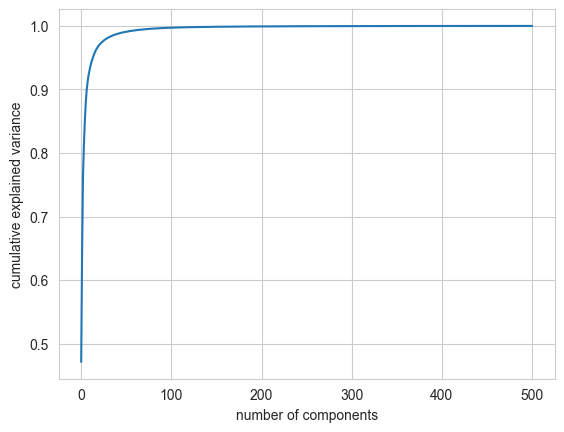

In [64]:
import seaborn as sns
from sklearn.decomposition import PCA

sns.set_style('whitegrid')
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [65]:
pca = PCA(n_components=2)
pca.fit(X_std)
print('explained variance :')
print('--------------------------------------------------------------------')
print(pca.explained_variance_)
print('--------------------------------------------------------------------')
print('PCA Components : ')
print('--------------------------------------------------------------------')
print(pca.components_)
print('--------------------------------------------------------------------')
X_transformed = pca.transform(X_std)
print('Transformed Feature values first five rows :')
print('--------------------------------------------------------------------')
print(X_transformed[:5,:])
print('--------------------------------------------------------------------')
print('Transformed Feature shape :')
print('--------------------------------------------------------------------')
print(X_transformed.shape)
print('--------------------------------------------------------------------')
print('Original Feature shape :')
print('--------------------------------------------------------------------')
print(X_std.shape)
print('--------------------------------------------------------------------')
print('Restransformed Feature shape :')
print('--------------------------------------------------------------------')
X_retransformed = pca.inverse_transform(X_transformed)
print(X_retransformed.shape)
print('--------------------------------------------------------------------')
print('Retransformed Feature values first five rows :')
print('--------------------------------------------------------------------')
print(X_retransformed[:5,:])
print('--------------------------------------------------------------------')


explained variance :
--------------------------------------------------------------------
[236.04058107  86.19123638]
--------------------------------------------------------------------
PCA Components : 
--------------------------------------------------------------------
[[-0.06114701 -0.03924041 -0.04096625 ... -0.06236711  0.00246362
  -0.05163077]
 [-0.01775002 -0.06423325  0.0339453  ... -0.02028463 -0.08125743
  -0.05938866]]
--------------------------------------------------------------------
Transformed Feature values first five rows :
--------------------------------------------------------------------
[[25.59509485  9.9807717 ]
 [25.69257356  9.86717585]
 [25.60957179  9.80054524]
 [25.71231341  9.96900029]
 [25.62346755  9.85263868]]
--------------------------------------------------------------------
Transformed Feature shape :
--------------------------------------------------------------------
(41266, 2)
-------------------------------------------------------------------

## K-Means

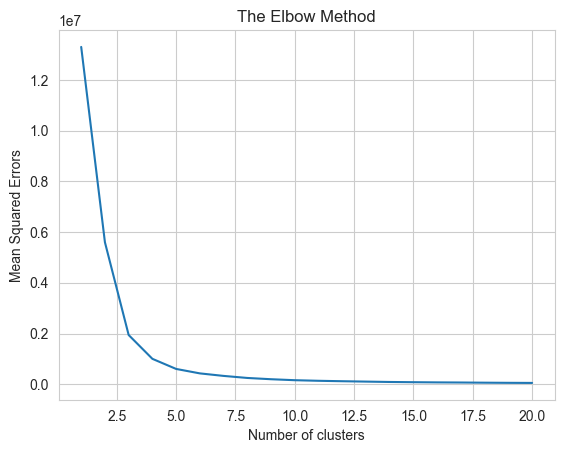

<Figure size 1000x800 with 0 Axes>

In [66]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Mean Squared Errors')
plt.figure(figsize=(10,8))
plt.show()

<AxesSubplot:title={'center':'Elbow Plot'}, xlabel='Number of clusters', ylabel='Sum of Squared Errors'>

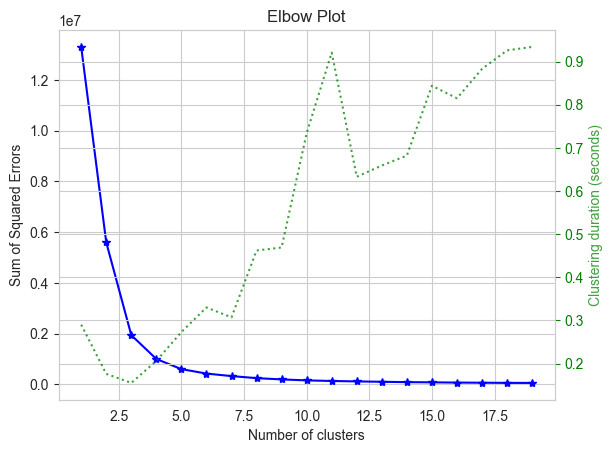

In [67]:
import scikitplot
scikitplot.cluster.plot_elbow_curve(KMeans(),X_transformed,cluster_ranges=range(1,20))

In [68]:
X_trans = pd.DataFrame(X_transformed,columns=['PCA1','PCA2']) 
X_trans

,PCA1,PCA2
0,25.595095,9.980772
1,25.692574,9.867176
2,25.609572,9.800545
3,25.712313,9.969000
4,25.623468,9.852639
...,...,...
41261,-22.810922,13.336946
41262,-22.839648,13.324557
41263,-22.790255,13.347231
41264,-22.636893,13.437198


### K-Means with 5 clusters

In [69]:
k_means = KMeans(n_clusters=5,random_state=42,init='k-means++')
X_trans['cluster number'] = k_means.fit_predict(X_trans)
X_trans['cluster number'].unique()

array([0, 2, 4, 1, 3])

In [70]:
y_kmeans = kmeans.fit_predict(X_transformed)
y_kmeans

array([13, 13, 13, ..., 10, 10, 10])

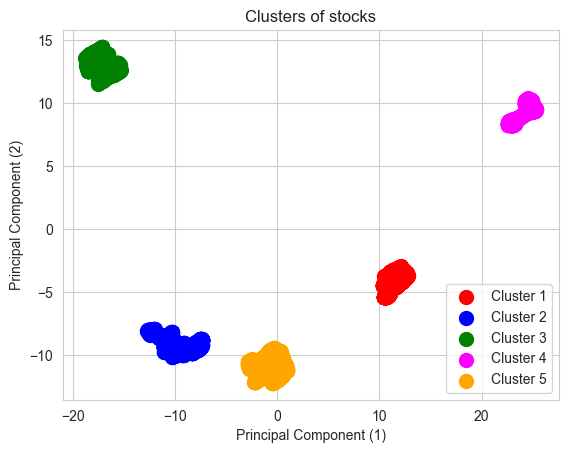

In [71]:
plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_transformed[y_kmeans == 2, 0], X_transformed[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_transformed[y_kmeans == 3, 0], X_transformed[y_kmeans == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(X_transformed[y_kmeans == 4, 0], X_transformed[y_kmeans == 4, 1], s = 100, c = 'orange', label = 'Cluster 5')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of stocks')
plt.xlabel('Principal Component (1)')
plt.ylabel('Principal Component (2)')
plt.legend()
plt.show()

In [72]:
X_trans['cluster number'].unique()

array([0, 2, 4, 1, 3])